# Sentiment Analysis of New York Times Articles (2022)

This notebook performs sentiment analysis on New York Times article titles from 2022, analyzing sentiment trends throughout the year.

## Table of Contents
1. Data Collection
2. Data Storage
3. Sentiment Analysis
4. Visualization
5. Semantic Analysis

# Imports


In [1]:
import os

from helper_functions import *
from database_functions import *
from sentiment_analysis_helpers import *
from sentiment_analysis_visualisation import *


C:\Users\zecab\Repositories\Sentiment_Analysis_NYT\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load environment variables

In [2]:
# NYT API configuration
from dotenv import load_dotenv

load_dotenv()
API_KEY = os.getenv("API_KEY")

BASE_URL = "https://api.nytimes.com/svc/search/v2/articlesearch.json"

In [3]:

# Fetch articles for January 2022
fetch_articles(year=2022, month=1, pages=1, api_key=API_KEY)

sleeping.....


['The Hard-Line Russian Advisers Who Have Putin’s Ear',
 'Obscure but Crucial Commodity Fuels Geopolitical Tussle in Eastern Europe',
 'Britain Toughens Stance on Russia, as Russia Presses NATO for Assurances',
 'England extends vaccines to vulnerable children ages 5 to 11.',
 'Covid-era controls may outlast the virus in China.',
 'U.S. Allies Retake Control of Prison in Syria, Subduing ISIS Fighters',
 'Living by the Code: In China, Covid-Era Controls May Outlast the Virus',
 'North Korea’s Latest Missile Test Appears to Be Its Boldest in Years',
 'New York coronavirus cases fell by 50 percent in the past week.',
 'For those with underlying conditions, an Omicron infection can be anything but mild.']

In [3]:
create_table()

Creating table articles_titles...


In [4]:
insert_articles_for_year_in_db(2022, API_KEY)


Inserting articles for year 2022...
sleeping.....
Month 1 done.
sleeping.....
Month 2 done.
sleeping.....
Month 3 done.
sleeping.....
Month 4 done.
sleeping.....
Month 5 done.
sleeping.....
Month 6 done.
sleeping.....
Month 7 done.
sleeping.....
Month 8 done.
sleeping.....
Month 9 done.
Request failed with status code: 429
sleeping.....
Month 10 done.
Request failed with status code: 429
sleeping.....
Month 11 done.
Request failed with status code: 429
sleeping.....
Month 12 done.
Done.


In [6]:
df = load_articles_from_db(db_path='nyt_articles.db')

In [7]:
# Initialize sentiment analyzer
sentiment_analyzer = initialize_sentiment_analyzer()

Device set to use cpu


In [9]:
df

,id,title,year,month
0,1,The Hard-Line Russian Advisers Who Have Putin’...,2022,1
1,2,Obscure but Crucial Commodity Fuels Geopolitic...,2022,1
2,3,"Britain Toughens Stance on Russia, as Russia P...",2022,1
3,4,England extends vaccines to vulnerable childre...,2022,1
4,5,Covid-era controls may outlast the virus in Ch...,2022,1
...,...,...,...,...
85,86,Vatican Disciplined Nobel Laureate Bishop Over...,2022,9
86,87,Putin concedes that some men were wrongly draf...,2022,9
87,88,Russia Beat and Denied Food to Prisoners of Wa...,2022,9
88,89,A sergeant who died fighting in eastern Donets...,2022,9


In [11]:
df['sentiment_score'] = df['title'].apply(lambda text: get_sentiment_score(sentiment_analyzer, text))

In [12]:
# Calculate monthly averages
monthly_sentiment = df.groupby('month')['sentiment_score'].mean().reset_index()

In [13]:
monthly_sentiment

,month,sentiment_score
0,1,0.5
1,2,0.5
2,3,0.0
3,4,0.2
4,5,0.4
5,6,0.2
6,7,0.1
7,8,0.4
8,9,0.5


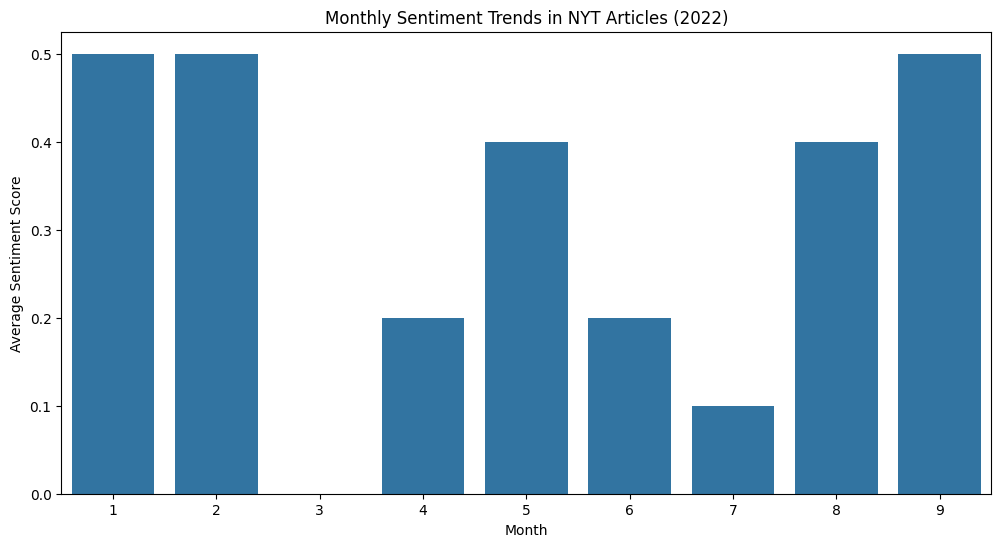

In [14]:
plot_monthly_sentiment(monthly_sentiment)

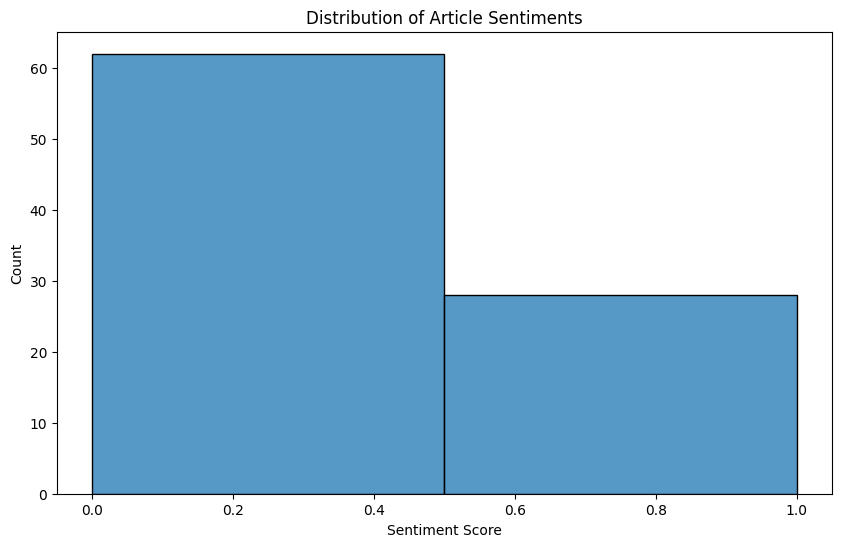

In [15]:
plot_sentiment_distribution(df)

## Conclusion

This analysis reveals patterns in sentiment across NYT articles throughout 2022. The visualizations show:
1. Monthly trends in article sentiment
2. Overall distribution of positive vs negative articles
3. Semantic relationships between article titles

Note: To use this notebook, replace the `API_KEY` variable with your actual NYT API key.